# Generate Maps for GAN training
This notebooks uses the GA implemented on Micropolis to generate 64x64 maps to train the GAN

In [4]:
import os
from mapPrinter import plotResults, getMapImage, saveMapInts
os.chdir("/home/branche/ML_TERM/gym-micropolis-ga/")
from MicropolisControlScript import Quimby
os.chdir("/home/branche/ML_TERM/gym-micropolis-ga/")
import numpy as np
import pickle 
import matplotlib.pyplot as plt
%matplotlib inline

# Genetic Algorithm to build micropolis city

In [2]:
q = pickle.load(open('saves/gan/test.obj', 'rb'))

Training the GA

In [2]:
%%capture
map_size = 64
steps = 35

q = Quimby(map_w=map_size,map_h=map_size,chromosome_len=map_size**2,n_population=50,n_steps_evaluation=steps)

q.ga(nb_generations=20, mutation_rate=0, p_selection=0.2, couple_size=5, nb_splits=1, eval="average")

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
mapSize:64, chromosome_len:4096, n_population:50, n_steps_evaluation:35
nb_generations:20, mutation_rate:0, p_selection:0.2, couple_size:5, eval:average
best score in last gen = 5946


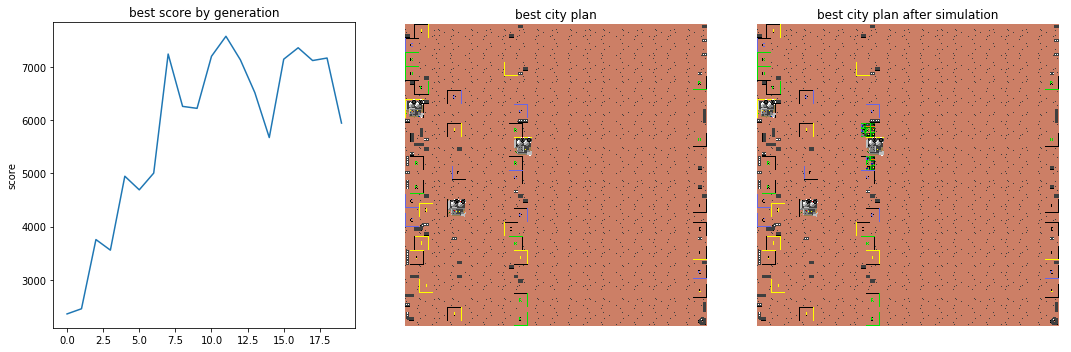

<Figure size 1080x360 with 0 Axes>

In [5]:
plt.rcParams['figure.figsize'] = [15, 5]
plotResults(q)

Saves population on file so that we can open it in a new notebook to display the results

In [6]:
savepath="saves/gan/"
filename="test"
cityindex=0

In [7]:
# Saves model parameters and population
pickle.dump(q, open(savepath + filename + ".obj", 'wb') )

In [8]:
# Select city to save
city = q.genomes[cityindex]
# Build the city
m = q.build_city(city=city, display=False)
# Save array of int and png image
saveMapInts(m.getTileMap(), savepath+filename+"_"+str(cityindex)+".npy")
getMapImage(m.getTileMap()).save(savepath+filename+"_"+str(cityindex)+".png","PNG")

## Visualize map

Let's pick the best city in our genome :